In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Example: load dataset (replace with your actual CSV path)
# The dataset should have columns like: Year, Vehicle_Type, Sales, Recession, GDP, Avg_Price, Unemployment_Rate, Advertisement_Expenditure
df = pd.read_csv("historical_automobile_sales.csv")

# Ensure columns are correct (you may need to adapt column names depending on dataset)
df.head()


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


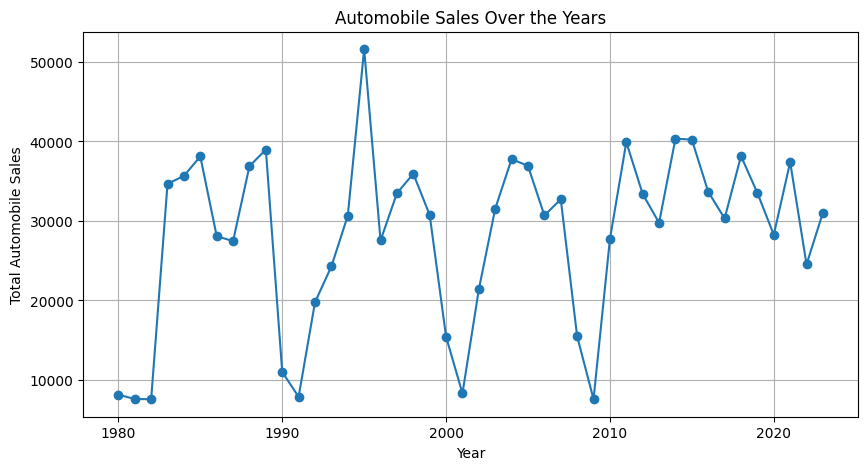

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Aggregate sales by year
annual_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Create a line plot
annual_sales.plot(kind='line', marker='o', figsize=(10,5), title='Automobile Sales Over the Years')

# Add labels
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.show()


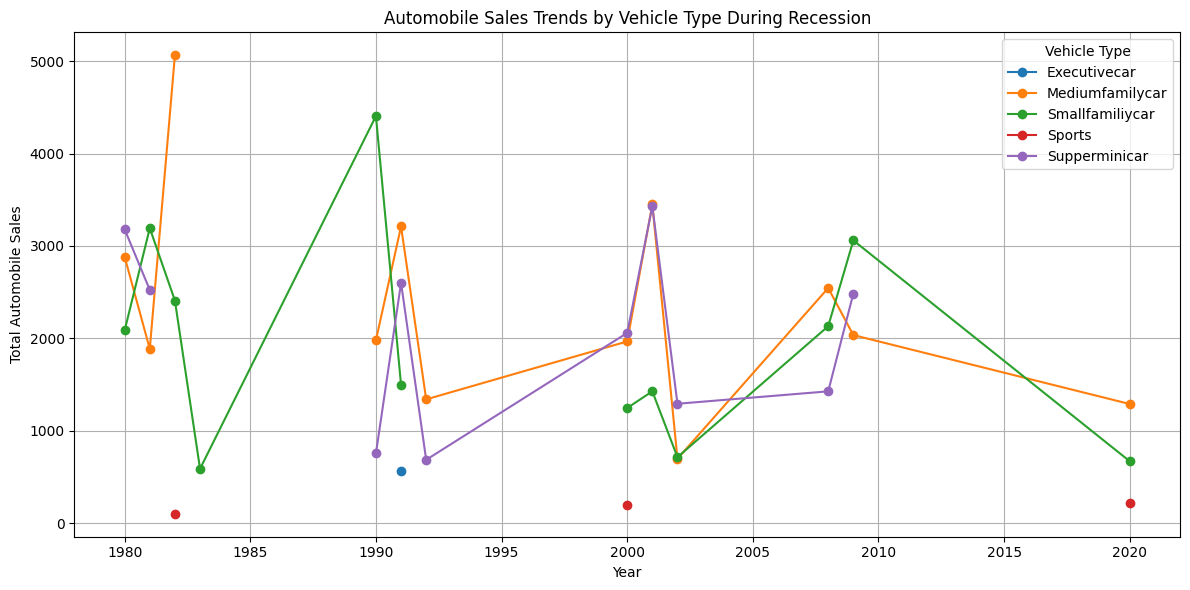

In [ ]:
# Filter for recession periods
recession_df = df[df['Recession'] == 1]

# Aggregate sales by Year and Vehicle_Type
sales_by_type = recession_df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot multiple lines
sales_by_type.plot(kind='line', marker='o', figsize=(12,6), title='Automobile Sales Trends by Vehicle Type During Recession')

# Add labels and grid
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

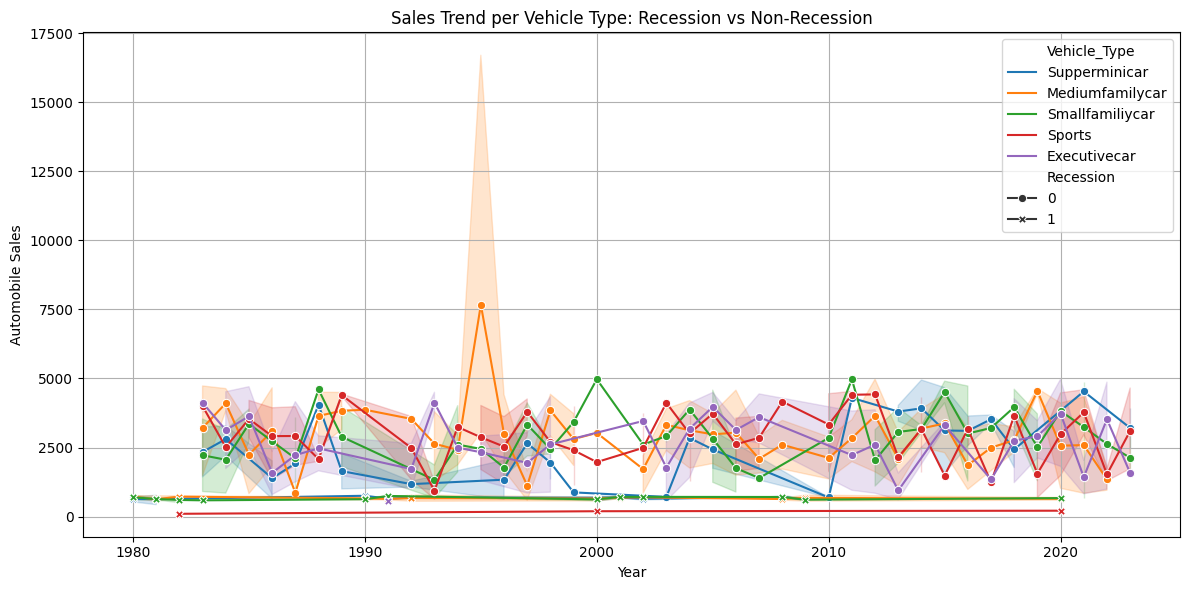

In [ ]:
import seaborn as sns

# Create a line plot with Seaborn comparing recession vs non-recession periods
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True, dashes=False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('Seaborn_Sales_Trend.png')
plt.show()


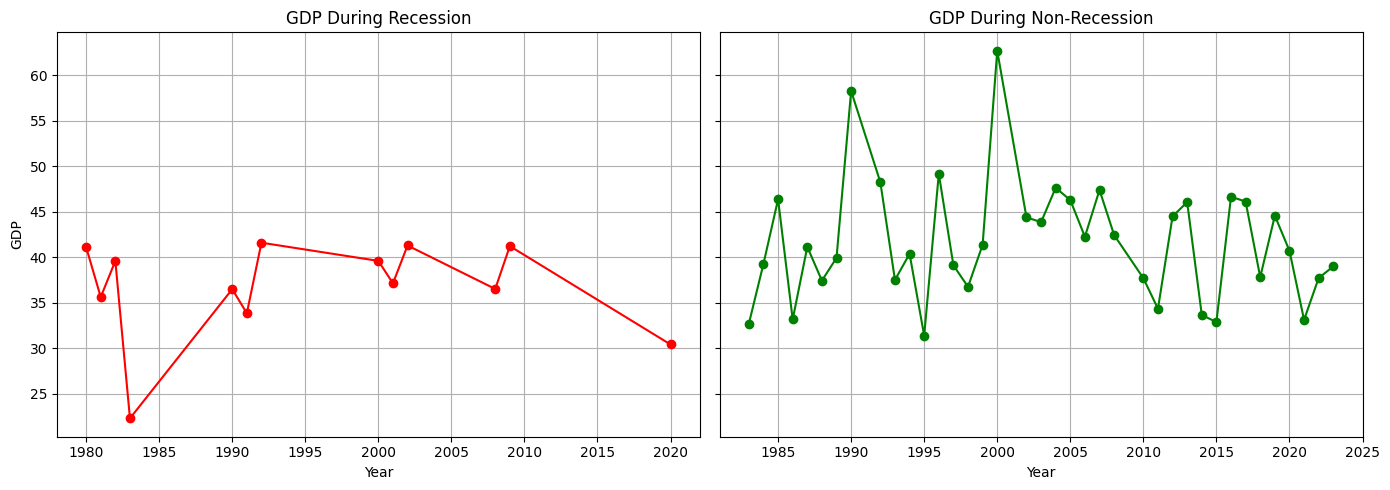

In [ ]:
# Filter data for recession and non-recession periods
recession_df = df[df['Recession'] == 1]
non_recession_df = df[df['Recession'] == 0]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# GDP during recession
axes[0].plot(recession_df.groupby('Year')['GDP'].mean(), marker='o', color='red')
axes[0].set_title('GDP During Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

# GDP during non-recession
axes[1].plot(non_recession_df.groupby('Year')['GDP'].mean(), marker='o', color='green')
axes[1].set_title('GDP During Non-Recession')
axes[1].set_xlabel('Year')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('GDP_Subplots.png')
plt.show()


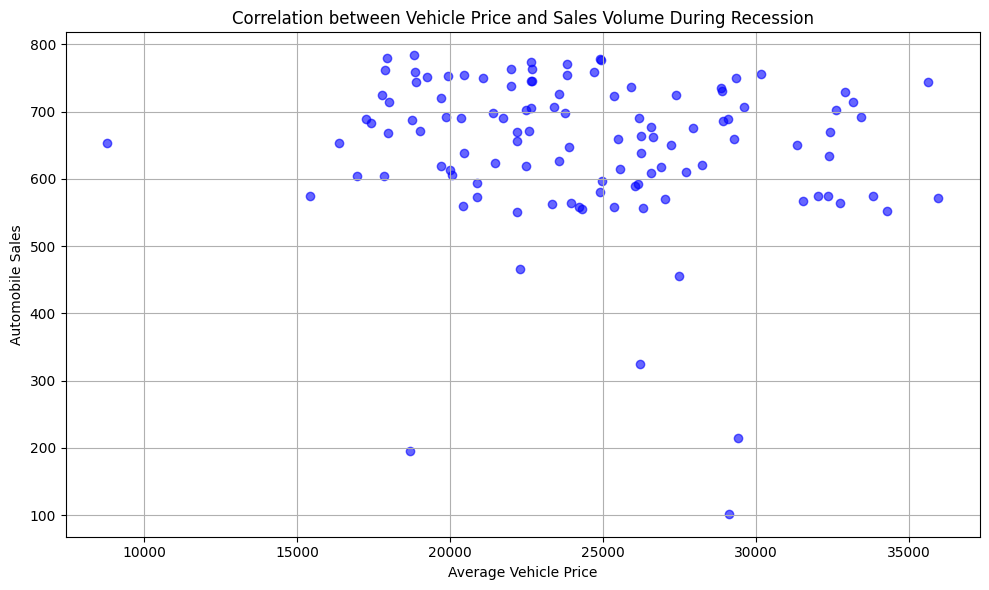

In [ ]:
# Filter for recession period
recession_df = df[df['Recession'] == 1]
plt.figure(figsize=(10,6))
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'], alpha=0.6, color='blue')
plt.title('Correlation between Vehicle Price and Sales Volume During Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


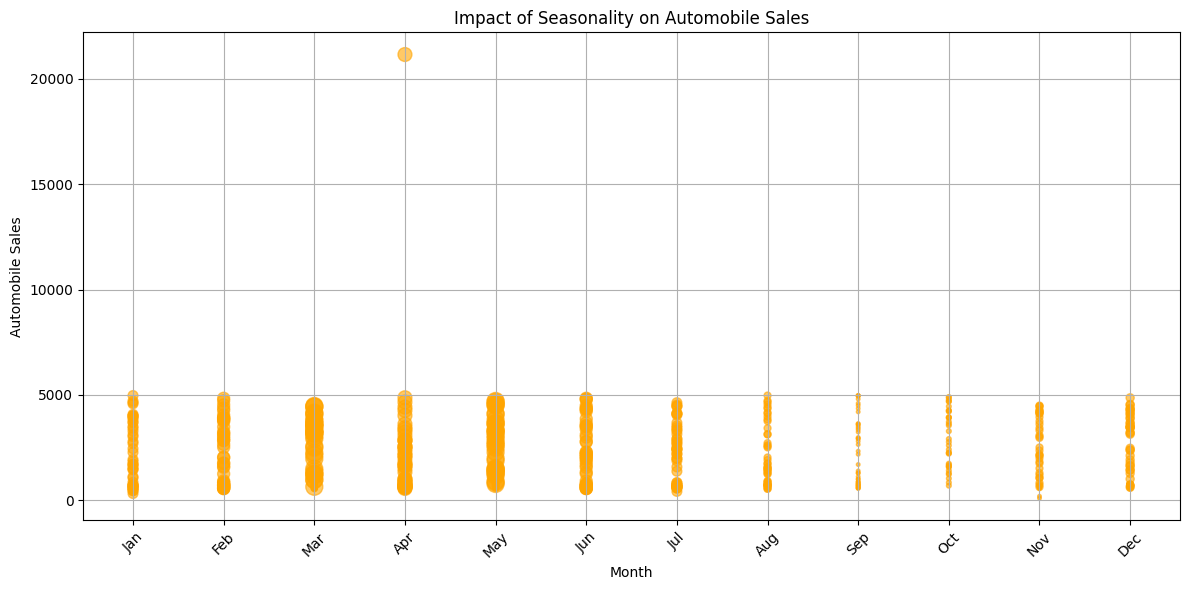

In [ ]:
# Bubble plot: Month vs Automobile Sales, bubble size based on Seasonality_Weight
plt.figure(figsize=(12,6))
plt.scatter(df['Month'], df['Automobile_Sales'],
            s=df['Seasonality_Weight']*100,  # scale bubble size
            alpha=0.6, color='orange')
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


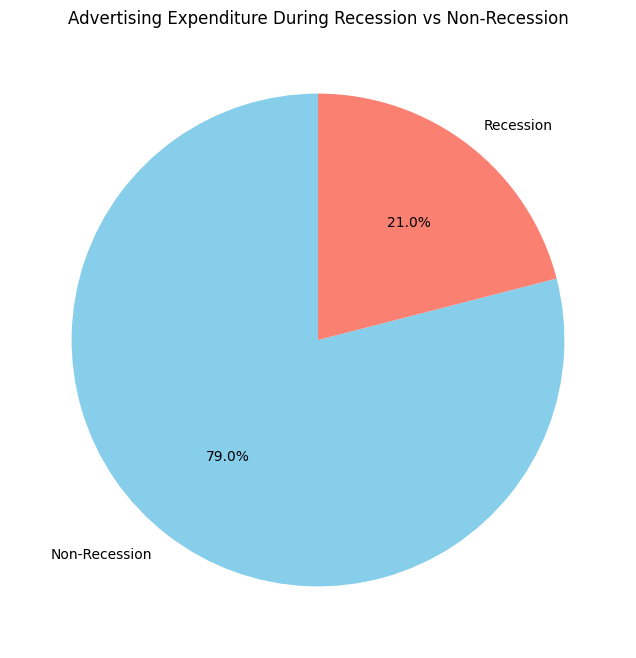

In [ ]:
# Aggregate advertising expenditure by recession status
ad_exp = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(ad_exp, labels=['Non-Recession', 'Recession'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Advertising Expenditure During Recession vs Non-Recession')
plt.show()


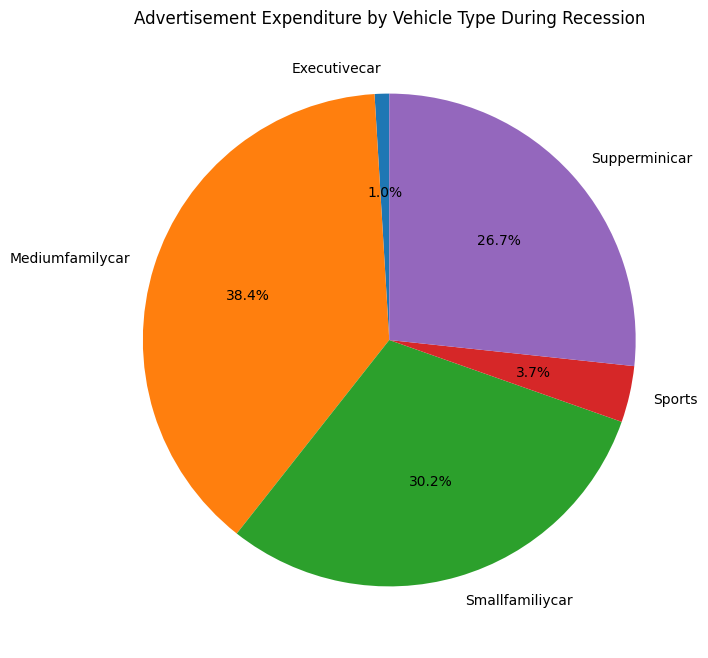

In [ ]:
# Filter for recession period
recession_df = df[df['Recession'] == 1]

# Aggregate advertising expenditure by vehicle type
ad_by_vehicle = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(ad_by_vehicle, labels=ad_by_vehicle.index, autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure by Vehicle Type During Recession')
plt.show()


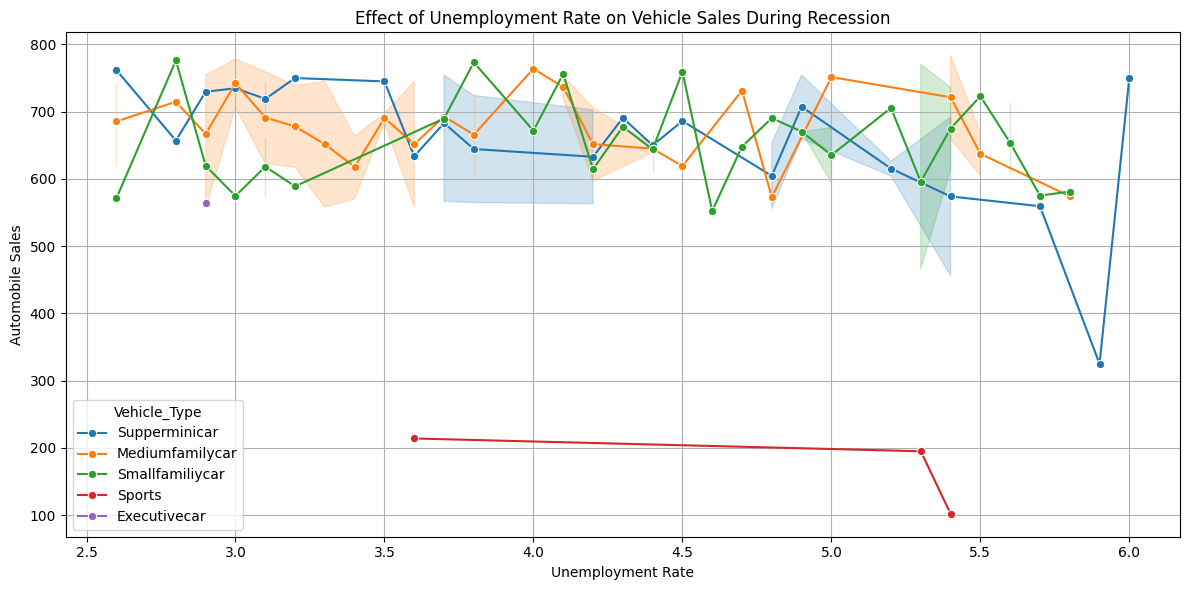

In [ ]:
# Filter for recession period
recession_df = df[df['Recession'] == 1]

# Line plot: Unemployment rate vs Automobile Sales by Vehicle Type
plt.figure(figsize=(12,6))
sns.lineplot(data=recession_df, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Effect of Unemployment Rate on Vehicle Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.1 MB/s eta 0:00:00


In [ ]:
from dash import Dash, html

# Create the Dash app
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

# Define the layout
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'})
])

# Run the app inline in Colab
app.run(mode='inline', debug=True)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Create Dash app
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

# Layout with dropdowns, output container, and graph placeholder
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'}),

    # Vehicle dropdown
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
            value=df['Vehicle_Type'].unique()[0],
            clearable=False
        )
    ], style={'width':'30%', 'display':'inline-block', 'padding':'10px'}),

    # Statistic dropdown
    html.Div([
        html.Label("Select Statistic:"),
        dcc.Dropdown(
            id='stat-dropdown',
            options=[
                {'label': 'Total Sales', 'value': 'Automobile_Sales'},
                {'label': 'Advertising Expenditure', 'value': 'Advertising_Expenditure'},
                {'label': 'Price', 'value': 'Price'}
            ],
            value='Automobile_Sales',
            clearable=False
        )
    ], style={'width':'30%', 'display':'inline-block', 'padding':'10px'}),

    # Output container
    html.Div(id='output-container', className='output-class',
             style={'padding':'20px', 'border':'1px solid #ccc'}),

    # Graph container
    dcc.Graph(id='stat-graph')
])

# Callback to update output container and graph
@app.callback(
    Output('output-container', 'children'),
    Output('stat-graph', 'figure'),
    Input('vehicle-dropdown', 'value'),
    Input('stat-dropdown', 'value')
)
def update_dashboard(selected_vehicle, selected_stat):
    # Filter dataframe
    filtered_df = df[df['Vehicle_Type'] == selected_vehicle]

    # Aggregate value by year
    yearly_data = filtered_df.groupby('Year')[selected_stat].sum().reset_index()

    # Output text
    total_value = yearly_data[selected_stat].sum()
    output_text = f"Total {selected_stat.replace('_',' ')} for {selected_vehicle}: {total_value}"

    # Create line chart
    fig = px.line(yearly_data, x='Year', y=selected_stat,
                  title=f"{selected_stat.replace('_',' ')} Trend for {selected_vehicle}")

    return output_text, fig

# Run in Colab
app.run(mode='inline', debug=True)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
from google.colab import output

# Create Dash app
app = Dash(__name__)

# Example layout (from Task 2.4, you can extend later)
app.layout = html.Div([
    html.H2("Automobile Sales Dashboard"),
    dcc.Dropdown(
        id='vehicle-dropdown',
        options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
        value=df['Vehicle_Type'].unique()[0],
        clearable=False
    ),
    html.Div(id='output-container')
])

# Callback
@app.callback(
    Output('output-container', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_output(selected_vehicle):
    filtered_df = df[df['Vehicle_Type'] == selected_vehicle]
    return f"Selected Vehicle: {selected_vehicle}, Total Sales: {filtered_df['Automobile_Sales'].sum()}"

# ✅ Use this in Colab instead of app.run_server()
app.run(port=8050)  # starts the server

# Create a link to open it in Colab
output.serve_kernel_port_as_window(8050)


<IPython.core.display.Javascript object>

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
from google.colab import output

# Filter data for recession
recession_df = df[df['Recession'] == 1]

# Create app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H2("Recession Report Statistics Dashboard"),

    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'GDP', 'value': 'GDP'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
        ],
        value='Automobile_Sales',
        clearable=False
    ),

    html.Div(id='stat-output'),
    dcc.Graph(id='stat-graph')
])

# Callback
@app.callback(
    Output('stat-output', 'children'),
    Output('stat-graph', 'figure'),
    Input('stat-dropdown', 'value')
)
def update_recession_report(selected_stat):
    fig = px.line(
        recession_df,
        x='Year',
        y=selected_stat,
        color='Vehicle_Type',
        title=f"{selected_stat} during Recession by Vehicle Type"
    )
    return f"Displaying {selected_stat} statistics during recession.", fig

# Run app in Colab (gives a link)
app.run(port=8050)
output.serve_kernel_port_as_window(8050)


<IPython.core.display.Javascript object>

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px

# Aggregate yearly automobile sales per vehicle type
yearly_df = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()

# Create line chart for yearly sales
fig = px.line(
    yearly_df,
    x="Year",
    y="Automobile_Sales",
    color="Vehicle_Type",
    markers=True,
    title="Yearly Report Statistics - Automobile Sales by Vehicle Type"
)

# Display in Colab
fig.show()


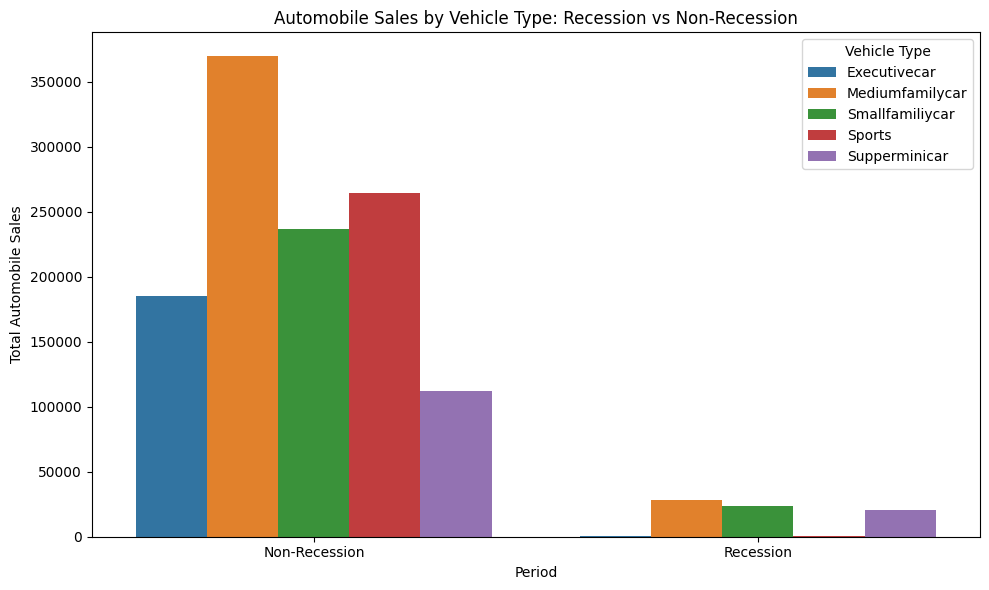

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate total sales per Vehicle_Type for each Recession period
agg_df = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()

# Map Recession values to labels
agg_df['Period'] = agg_df['Recession'].map({1: 'Recession', 0: 'Non-Recession'})

# Set figure size
plt.figure(figsize=(10,6))

# Create grouped bar chart
sns.barplot(data=agg_df, x='Period', y='Automobile_Sales', hue='Vehicle_Type')

# Labels and title
plt.xlabel("Period")
plt.ylabel("Total Automobile Sales")
plt.title("Automobile Sales by Vehicle Type: Recession vs Non-Recession")
plt.legend(title="Vehicle Type")
plt.tight_layout()

# Show plot
plt.show()




In [ ]:
import plotly.express as px

# Bubble plot: x = Month, y = Automobile Sales, size = Seasonality_Weight, color = Vehicle_Type
fig = px.scatter(
    df,
    x="Month",
    y="Automobile_Sales",
    size="Seasonality_Weight",
    color="Vehicle_Type",
    title="Impact of Seasonality on Automobile Sales",
    hover_name="Vehicle_Type",
    size_max=60
)

# Show plot
fig.show()



In [ ]:
from dash import Dash, html

# Create Dash app
app = Dash(__name__)

# Layout with centered, colored title
app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={
            'textAlign': 'center',
            'color': 'darkblue'
        }
    )
])

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc

app = Dash(__name__)

app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': 'darkblue'}
    ),

    # Side-by-side dropdowns
    html.Div([
        html.Div([
            html.Label("Select Statistics:"),
            dcc.Dropdown(
                id='stat-dropdown',
                options=[
                    {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
                    {'label': 'GDP', 'value': 'GDP'},
                    {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
                ],
                value='Automobile_Sales'
            )
        ], style={'flex': '1'}),

        html.Div([
            html.Label("Enter Year:"),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in range(1980, 2025)],
                value=2020,
                disabled=True
            )
        ], style={'flex': '1'})
    ], style={'display': 'flex', 'gap': '20px'})  # Flex container
])
app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc

# Create Dash app
app = Dash(__name__)

# Layout with output container
app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': 'darkblue'}
    ),

    html.Label("Select Statistics:"),
    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'GDP', 'value': 'GDP'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
        ],
        value='Automobile_Sales'
    ),

    # Output container with id and classname
    html.Div(
        id='output-container',
        className='output-div',
        children="This is where the output will appear."
    )
])

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Create Dash app
app = Dash(__name__)

# Layout with dropdown, output container, and graph
app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': 'darkblue'}
    ),

    html.Label("Select Statistics:"),
    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'GDP', 'value': 'GDP'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
        ],
        value='Automobile_Sales'
    ),

    html.Div(
        id='output-container',
        className='output-div',
        children="Selected statistics output will appear here."
    ),

    dcc.Graph(id='stat-graph')
])

# Sample aggregated data for demonstration
agg_df = df.groupby(['Year', 'Vehicle_Type'], as_index=False)[
    'Automobile_Sales'].sum()

# Callback 1: Update output container text
@app.callback(
    Output('output-container', 'children'),
    Input('stat-dropdown', 'value')
)
def update_output_text(selected_stat):
    return f"You have selected: {selected_stat}"

# Callback 2: Update graph based on dropdown selection
@app.callback(
    Output('stat-graph', 'figure'),
    Input('stat-dropdown', 'value')
)
def update_graph(selected_stat):
    if selected_stat == 'Automobile_Sales':
        fig = px.line(
            agg_df,
            x='Year',
            y='Automobile_Sales',
            color='Vehicle_Type',
            markers=True,
            title='Yearly Automobile Sales by Vehicle Type'
        )
    elif selected_stat == 'GDP':
        fig = px.line(df, x='Year', y='GDP', color='Vehicle_Type', title='Yearly GDP by Vehicle Type')
    else:  # Unemployment Rate
        fig = px.line(df, x='Year', y='unemployment_rate', color='Vehicle_Type', title='Yearly Unemployment Rate by Vehicle Type')
    return fig


app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc

# Filter recession data
recession_df = df[df['Recession'] == 1]

# Line chart: Automobile Sales over Years by Vehicle Type
line_fig = px.line(
    recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
    x='Year',
    y='Automobile_Sales',
    color='Vehicle_Type',
    markers=True,
    title="Recession: Yearly Automobile Sales by Vehicle Type"
)

# Bar chart: Total Sales per Vehicle Type during Recession
bar_fig = px.bar(
    recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
    x='Vehicle_Type',
    y='Automobile_Sales',
    title="Recession: Total Sales by Vehicle Type"
)

# Pie chart: Advertising Expenditure share during Recession
pie_fig = px.pie(
    recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
    names='Vehicle_Type',
    values='Advertising_Expenditure',
    title="Recession: Advertising Expenditure by Vehicle Type"
)

# Bubble plot: Seasonality impact on Automobile Sales during Recession
bubble_fig = px.scatter(
    recession_df,
    x='Month',
    y='Automobile_Sales',
    size='Seasonality_Weight',
    color='Vehicle_Type',
    title="Recession: Impact of Seasonality on Sales",
    size_max=60
)

# Dash app layout for display
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Recession Report",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    html.H2("Line Chart"),
    dcc.Graph(figure=line_fig),

    html.H2("Bar Chart"),
    dcc.Graph(figure=bar_fig),

    html.H2("Pie Chart"),
    dcc.Graph(figure=pie_fig),

    html.H2("Bubble Chart"),
    dcc.Graph(figure=bubble_fig)
])

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

# Create Dash app
app = Dash(__name__)

# Year dropdown options
years = df['Year'].unique()

app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Yearly Report",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(y), 'value': y} for y in years],
        value=years[0]
    ),

    html.H2("Line Chart"),
    dcc.Graph(id='line-chart'),

    html.H2("Bar Chart"),
    dcc.Graph(id='bar-chart'),

    html.H2("Pie Chart"),
    dcc.Graph(id='pie-chart'),

    html.H2("Bubble Chart"),
    dcc.Graph(id='bubble-chart')
])

# Callback to update all four charts based on selected year
@app.callback(
    Output('line-chart', 'figure'),
    Output('bar-chart', 'figure'),
    Output('pie-chart', 'figure'),
    Output('bubble-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_yearly_graphs(selected_year):
    # Filter data for selected year
    yearly_df = df[df['Year'] == selected_year]

    # Line chart: Automobile Sales by Vehicle Type
    line_fig = px.line(
        yearly_df.groupby(['Month', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
        x='Month',
        y='Automobile_Sales',
        color='Vehicle_Type',
        markers=True,
        title=f"Year {selected_year}: Monthly Automobile Sales by Vehicle Type"
    )

    # Bar chart: Total Sales per Vehicle Type
    bar_fig = px.bar(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
        x='Vehicle_Type',
        y='Automobile_Sales',
        title=f"Year {selected_year}: Total Sales by Vehicle Type"
    )

    # Pie chart: Advertising Expenditure per Vehicle Type
    pie_fig = px.pie(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
        names='Vehicle_Type',
        values='Advertising_Expenditure',
        title=f"Year {selected_year}: Advertising Expenditure by Vehicle Type"
    )

    # Bubble chart: Seasonality impact on Automobile Sales
    bubble_fig = px.scatter(
        yearly_df,
        x='Month',
        y='Automobile_Sales',
        size='Seasonality_Weight',
        color='Vehicle_Type',
        title=f"Year {selected_year}: Impact of Seasonality on Sales",
        size_max=60
    )

    return line_fig, bar_fig, pie_fig, bubble_fig

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc

# Create Dash app
app = Dash(__name__)

# Layout with output container
app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': 'darkblue'}
    ),

    html.Label("Select Statistics:"),
    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'GDP', 'value': 'GDP'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
        ],
        value='Automobile_Sales'
    ),

    # Output container with id and classname
    html.Div(
        id='output-container',
        className='output-div',
        children="This is where the output will appear."
    )
])

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Create Dash app
app = Dash(__name__)

# Layout with dropdown, output container, and graph
app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={'textAlign': 'center', 'color': 'darkblue'}
    ),

    html.Label("Select Statistics:"),
    dcc.Dropdown(
        id='stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'GDP', 'value': 'GDP'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'}
        ],
        value='Automobile_Sales'
    ),

    html.Div(
        id='output-container',
        className='output-div',
        children="Selected statistics output will appear here."
    ),

    dcc.Graph(id='stat-graph')
])

# Sample aggregated data for demonstration
agg_df = df.groupby(['Year', 'Vehicle_Type'], as_index=False)[
    'Automobile_Sales'].sum()

# Callback 1: Update output container text
@app.callback(
    Output('output-container', 'children'),
    Input('stat-dropdown', 'value')
)
def update_output_text(selected_stat):
    return f"You have selected: {selected_stat}"

# Callback 2: Update graph based on dropdown selection
@app.callback(
    Output('stat-graph', 'figure'),
    Input('stat-dropdown', 'value')
)
def update_graph(selected_stat):
    if selected_stat == 'Automobile_Sales':
        fig = px.line(
            agg_df,
            x='Year',
            y='Automobile_Sales',
            color='Vehicle_Type',
            markers=True,
            title='Yearly Automobile Sales by Vehicle Type'
        )
    elif selected_stat == 'GDP':
        fig = px.line(df, x='Year', y='GDP', color='Vehicle_Type', title='Yearly GDP by Vehicle Type')
    else:  # Unemployment Rate
        fig = px.line(df, x='Year', y='unemployment_rate', color='Vehicle_Type', title='Yearly Unemployment Rate by Vehicle Type')
    return fig

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc

# Filter recession data
recession_df = df[df['Recession'] == 1]

# Line chart: Automobile Sales over Years by Vehicle Type
line_fig = px.line(
    recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
    x='Year',
    y='Automobile_Sales',
    color='Vehicle_Type',
    markers=True,
    title="Recession: Yearly Automobile Sales by Vehicle Type"
)

# Bar chart: Total Sales per Vehicle Type during Recession
bar_fig = px.bar(
    recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
    x='Vehicle_Type',
    y='Automobile_Sales',
    title="Recession: Total Sales by Vehicle Type"
)

# Pie chart: Advertising Expenditure share during Recession
pie_fig = px.pie(
    recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
    names='Vehicle_Type',
    values='Advertising_Expenditure',
    title="Recession: Advertising Expenditure by Vehicle Type"
)

# Bubble plot: Seasonality impact on Automobile Sales during Recession
bubble_fig = px.scatter(
    recession_df,
    x='Month',
    y='Automobile_Sales',
    size='Seasonality_Weight',
    color='Vehicle_Type',
    title="Recession: Impact of Seasonality on Sales",
    size_max=60
)

# Dash app layout for display
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Recession Report",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    html.H2("Line Chart"),
    dcc.Graph(figure=line_fig),

    html.H2("Bar Chart"),
    dcc.Graph(figure=bar_fig),

    html.H2("Pie Chart"),
    dcc.Graph(figure=pie_fig),

    html.H2("Bubble Chart"),
    dcc.Graph(figure=bubble_fig)
])

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

# Create Dash app
app = Dash(__name__)

# Year dropdown options
years = df['Year'].unique()

app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Yearly Report",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(y), 'value': y} for y in years],
        value=years[0]
    ),

    html.H2("Line Chart"),
    dcc.Graph(id='line-chart'),

    html.H2("Bar Chart"),
    dcc.Graph(id='bar-chart'),

    html.H2("Pie Chart"),
    dcc.Graph(id='pie-chart'),

    html.H2("Bubble Chart"),
    dcc.Graph(id='bubble-chart')
])

# Callback to update all four charts based on selected year
@app.callback(
    Output('line-chart', 'figure'),
    Output('bar-chart', 'figure'),
    Output('pie-chart', 'figure'),
    Output('bubble-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_yearly_graphs(selected_year):
    # Filter data for selected year
    yearly_df = df[df['Year'] == selected_year]

    # Line chart: Automobile Sales by Vehicle Type
    line_fig = px.line(
        yearly_df.groupby(['Month', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
        x='Month',
        y='Automobile_Sales',
        color='Vehicle_Type',
        markers=True,
        title=f"Year {selected_year}: Monthly Automobile Sales by Vehicle Type"
    )

    # Bar chart: Total Sales per Vehicle Type
    bar_fig = px.bar(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
        x='Vehicle_Type',
        y='Automobile_Sales',
        title=f"Year {selected_year}: Total Sales by Vehicle Type"
    )

    # Pie chart: Advertising Expenditure per Vehicle Type
    pie_fig = px.pie(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
        names='Vehicle_Type',
        values='Advertising_Expenditure',
        title=f"Year {selected_year}: Advertising Expenditure by Vehicle Type"
    )

    # Bubble chart: Seasonality impact on Automobile Sales
    bubble_fig = px.scatter(
        yearly_df,
        x='Month',
        y='Automobile_Sales',
        size='Seasonality_Weight',
        color='Vehicle_Type',
        title=f"Year {selected_year}: Impact of Seasonality on Sales",
        size_max=60
    )

    return line_fig, bar_fig, pie_fig, bubble_fig

app.run(port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc

# Filter recession data
recession_df = df[df['Recession'] == 1]

# Line chart: Sales over Years by Vehicle Type
line_fig = px.line(
    recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
    x='Year', y='Automobile_Sales', color='Vehicle_Type',
    markers=True, title="Recession: Yearly Automobile Sales by Vehicle Type"
)

# Bar chart: Total Sales per Vehicle Type
bar_fig = px.bar(
    recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
    x='Vehicle_Type', y='Automobile_Sales',
    title="Recession: Total Sales by Vehicle Type"
)

# Pie chart: Advertising Expenditure per Vehicle Type
pie_fig = px.pie(
    recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
    names='Vehicle_Type', values='Advertising_Expenditure',
    title="Recession: Advertising Expenditure by Vehicle Type"
)

# Bubble plot: Seasonality vs Sales
bubble_fig = px.scatter(
    recession_df, x='Month', y='Automobile_Sales',
    size='Seasonality_Weight', color='Vehicle_Type',
    title="Recession: Impact of Seasonality on Sales",
    size_max=60
)

# Dash app layout with 2x2 grid
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Recession Report",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    html.Div([
        html.Div([dcc.Graph(figure=line_fig, style={'height': '400px'})]),
        html.Div([dcc.Graph(figure=bar_fig, style={'height': '400px'})]),
        html.Div([dcc.Graph(figure=pie_fig, style={'height': '400px'})]),
        html.Div([dcc.Graph(figure=bubble_fig, style={'height': '400px'})])
    ], style={
        'display': 'grid',
        'gridTemplateColumns': '1fr 1fr',
        'gap': '10px',
        'padding': '10px',
        'height': '90vh'
    })
])
app.run(mode="inline")


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

# Create Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

# Layout with dropdown + 4 graphs in 2x2 grid
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard - Yearly Report",
            style={'textAlign': 'center', 'color': 'darkgreen'}),

    # Dropdown for year selection
    html.Div([
        html.Label("Enter Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(y), 'value': y} for y in sorted(df['Year'].unique())],
            value=sorted(df['Year'].unique())[0],
            clearable=False
        )
    ], style={'width': '40%', 'margin': 'auto', 'padding': '10px'}),

    # Graphs grid (2x2)
    html.Div([
        html.Div([dcc.Graph(id='year-line')], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(id='year-bar')], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(id='year-pie')], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(id='year-bubble')], style={'width': '50%', 'display': 'inline-block'})
    ])
])

# Callback for updating graphs
@app.callback(
    [Output('year-line', 'figure'),
     Output('year-bar', 'figure'),
     Output('year-pie', 'figure'),
     Output('year-bubble', 'figure')],
    Input('year-dropdown', 'value')
)
def update_yearly_graphs(selected_year):
    yearly_df = df[df['Year'] == selected_year]

    # Line chart: Monthly sales by vehicle type
    line_fig = px.line(
        yearly_df, x='Month', y='Automobile_Sales', color='Vehicle_Type',
        markers=True, title=f"Monthly Sales by Vehicle Type ({selected_year})"
    )

    # Bar chart: Total sales by vehicle type
    bar_fig = px.bar(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
        x='Vehicle_Type', y='Automobile_Sales',
        title=f"Total Sales by Vehicle Type ({selected_year})"
    )

    # Pie chart: Advertising expenditure by vehicle type
    pie_fig = px.pie(
        yearly_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
        names='Vehicle_Type', values='Advertising_Expenditure',
        title=f"Advertising Expenditure by Vehicle Type ({selected_year})"
    )

    # Bubble chart: Seasonality vs Sales
    bubble_fig = px.scatter(
        yearly_df, x='Month', y='Automobile_Sales',
        size='Seasonality_Weight', color='Vehicle_Type',
        title=f"Seasonality Impact on Sales ({selected_year})",
        size_max=60
    )

    return line_fig, bar_fig, pie_fig, bubble_fig


app.run(port=8050)   # then open link


<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

def yearly_report_statistics(year):
    # Filter dataframe for the selected year
    yearly_df = df[df['Year'] == year]

    if yearly_df.empty:
        print(f"No data available for year {year}")
        return

    # Create 2x2 figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Yearly Sales Statistics - {year}", fontsize=16, fontweight="bold")

    # 1. Line chart: Monthly Automobile Sales
    sns.lineplot(
        data=yearly_df,
        x="Month",
        y="Automobile_Sales",
        marker="o",
        ax=axes[0, 0]
    )
    axes[0, 0].set_title(f"Monthly Sales ({year})")

    # 2. Bar chart: Sales by Vehicle Type
    sales_by_type = yearly_df.groupby("Vehicle_Type", as_index=False)["Automobile_Sales"].sum()
    sns.barplot(data=sales_by_type, x="Vehicle_Type", y="Automobile_Sales", ax=axes[0, 1])
    axes[0, 1].set_title(f"Sales by Vehicle Type ({year})")
    axes[0, 1].tick_params(axis="x", rotation=30)

    # 3. Pie chart: Advertising Expenditure by Vehicle Type
    yearly_df.groupby("Vehicle_Type")["Advertising_Expenditure"].sum().plot(
        kind="pie",
        autopct="%1.1f%%",
        ax=axes[1, 0],
        ylabel=""
    )
    axes[1, 0].set_title(f"Advertising Expenditure Share ({year})")

    # 4. Bubble chart: Seasonality vs Sales
    sns.scatterplot(
        data=yearly_df,
        x="Month",
        y="Automobile_Sales",
        size="Seasonality_Weight",
        hue="Vehicle_Type",
        sizes=(50, 400),
        alpha=0.7,
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f"Seasonality Impact ({year})")
    axes[1, 1].tick_params(axis="x", rotation=30)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Dropdown for dynamic year selection
year_dropdown = widgets.Dropdown(
    options=sorted(df['Year'].unique()),
    value=df['Year'].min(),
    description="Select Year:"
)

widgets.interact(yearly_report_statistics, year=year_dropdown);


interactive(children=(Dropdown(description='Select Year:', options=(np.int64(1980), np.int64(1981), np.int64(1…

In [ ]:
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import pandas as pd

# Example dataset (replace with your df)
# df = pd.read_csv("automobile_sales.csv")

# Filter recession data
recession_df = df[df['Recession'] == 1]

# Initialize app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),

    dcc.Dropdown(
        id='report-type-dropdown',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession'
    ),

    html.Div(id='output-container')
])

# Callback: Display Recession Report graphs
@app.callback(
    Output('output-container', 'children'),
    Input('report-type-dropdown', 'value')
)
def display_recession_graphs(report_type):
    if report_type == 'recession':
        # Line chart
        line_fig = px.line(
            recession_df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
            x='Year', y='Automobile_Sales', color='Vehicle_Type',
            markers=True, title="Recession: Yearly Automobile Sales by Vehicle Type"
        )

        # Bar chart
        bar_fig = px.bar(
            recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
            x='Vehicle_Type', y='Automobile_Sales',
            title="Recession: Total Sales by Vehicle Type"
        )

        # Pie chart
        pie_fig = px.pie(
            recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
            names='Vehicle_Type', values='Advertising_Expenditure',
            title="Recession: Advertising Expenditure by Vehicle Type"
        )

        # Bubble chart
        bubble_fig = px.scatter(
            recession_df, x='Month', y='Automobile_Sales',
            size='Seasonality_Weight', color='Vehicle_Type',
            title="Recession: Impact of Seasonality on Sales", size_max=60
        )

        # Display all graphs
        return html.Div([
            html.Div([dcc.Graph(figure=line_fig)]),
            html.Div([dcc.Graph(figure=bar_fig)]),
            html.Div([dcc.Graph(figure=pie_fig)]),
            html.Div([dcc.Graph(figure=bubble_fig)])
        ], style={
            'display': 'grid',
            'gridTemplateColumns': '1fr 1fr',
            'gap': '10px',
            'padding': '10px'
        })

    return html.Div("Please select a report type")


# Run server
if __name__ == "__main__":
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Sample df assumed already loaded with required columns
# df = pd.read_csv("automobile_sales.csv")

app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'center', 'color': 'darkblue'}),

    # Report type dropdown
    dcc.Dropdown(
        id='report-type-dropdown',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession'
    ),

    # Input container (changes dynamically with callback 1)
    html.Div(id='input-container', style={'marginTop': '20px'}),

    # Output container (graphs will render here)
    html.Div(id='output-container', style={'marginTop': '20px'})
])

# -------------------------
# Callback 1: Update input container (year dropdown appears only for yearly report)
@app.callback(
    Output('input-container', 'children'),
    Input('report-type-dropdown', 'value')
)
def update_input_container(report_type):
    if report_type == 'yearly':
        return dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(y), 'value': y} for y in sorted(df['Year'].unique())],
            value=df['Year'].min(),
            placeholder="Select a year"
        )
    return html.Div("No additional input required for Recession Report")

# -------------------------
# Callback 2: Display graphs in output-container
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def display_graphs(report_type, selected_year):
    if report_type == 'recession':
        recession_df = df[df['Recession'] == 1]

        line_fig = px.line(
            recession_df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
            x='Year', y='Automobile_Sales', color='Vehicle_Type',
            markers=True, title="Recession: Yearly Automobile Sales by Vehicle Type"
        )
        bar_fig = px.bar(
            recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
            x='Vehicle_Type', y='Automobile_Sales', title="Recession: Total Sales by Vehicle Type"
        )
        pie_fig = px.pie(
            recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
            names='Vehicle_Type', values='Advertising_Expenditure',
            title="Recession: Advertising Expenditure by Vehicle Type"
        )
        bubble_fig = px.scatter(
            recession_df, x='Month', y='Automobile_Sales',
            size='Seasonality_Weight', color='Vehicle_Type',
            title="Recession: Impact of Seasonality on Sales", size_max=60
        )

        return html.Div([
            dcc.Graph(figure=line_fig), dcc.Graph(figure=bar_fig),
            dcc.Graph(figure=pie_fig), dcc.Graph(figure=bubble_fig)
        ], style={'display': 'grid','gridTemplateColumns': '1fr 1fr','gap': '10px'})

    elif report_type == 'yearly' and selected_year:
        yearly_df = df[df['Year'] == selected_year]

        line_fig = px.line(yearly_df, x='Month', y='Automobile_Sales',
                           color='Vehicle_Type', markers=True,
                           title=f"Year {selected_year}: Monthly Sales by Vehicle Type")
        bar_fig = px.bar(yearly_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
                         x='Vehicle_Type', y='Automobile_Sales',
                         title=f"Year {selected_year}: Total Sales by Vehicle Type")
        pie_fig = px.pie(yearly_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
                         names='Vehicle_Type', values='Advertising_Expenditure',
                         title=f"Year {selected_year}: Advertising Expenditure by Vehicle Type")
        bubble_fig = px.scatter(yearly_df, x='Month', y='Automobile_Sales',
                                size='Seasonality_Weight', color='Vehicle_Type',
                                title=f"Year {selected_year}: Impact of Seasonality on Sales",
                                size_max=60)

        return html.Div([
            dcc.Graph(figure=line_fig), dcc.Graph(figure=bar_fig),
            dcc.Graph(figure=pie_fig), dcc.Graph(figure=bubble_fig)
        ], style={'display': 'grid','gridTemplateColumns': '1fr 1fr','gap': '10px'})

    return html.Div("Please select a report type.")

# -------------------------
if __name__ == "__main__":
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Sample app
app = Dash(__name__)

# Dropdown + Output container
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),

    dcc.Dropdown(
        id='report-type-dropdown',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession',  # default
        style={'width': '50%'}
    ),

    html.Div(id='output-container', style={'marginTop': '20px'})
])

# Callback for displaying graphs
@app.callback(
    Output('output-container', 'children'),
    Input('report-type-dropdown', 'value')
)
def display_recession_graphs(report_type):
    if report_type == 'recession':
        recession_df = df[df['Recession'] == 1]

        # Line chart
        line_fig = px.line(
            recession_df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum(),
            x='Year', y='Automobile_Sales', color='Vehicle_Type',
            markers=True, title="Recession: Yearly Automobile Sales by Vehicle Type"
        )

        # Bar chart
        bar_fig = px.bar(
            recession_df.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum(),
            x='Vehicle_Type', y='Automobile_Sales',
            title="Recession: Total Sales by Vehicle Type"
        )

        # Pie chart
        pie_fig = px.pie(
            recession_df.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum(),
            names='Vehicle_Type', values='Advertising_Expenditure',
            title="Recession: Advertising Expenditure by Vehicle Type"
        )

        # Bubble chart
        bubble_fig = px.scatter(
            recession_df, x='Month', y='Automobile_Sales',
            size='Seasonality_Weight', color='Vehicle_Type',
            title="Recession: Impact of Seasonality on Sales", size_max=60
        )

        # Display all 4 graphs
        return html.Div([
            html.Div([dcc.Graph(figure=line_fig)]),
            html.Div([dcc.Graph(figure=bar_fig)]),
            html.Div([dcc.Graph(figure=pie_fig)]),
            html.Div([dcc.Graph(figure=bubble_fig)])
        ], style={
            'display': 'grid',
            'gridTemplateColumns': '1fr 1fr',
            'gap': '10px',
            'padding': '10px'
        })

    return html.Div("Please select a report type")

# Run in Colab
app.run(mode="inline")


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, html, dcc, Input, Output

# Initialize app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),

    dcc.Dropdown(
        id='report-type-dropdown',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession',
        style={'width': '50%'}
    ),

    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': yr, 'value': yr} for yr in sorted(df['Year'].unique())],
        value=df['Year'].min(),
        style={'width': '30%', 'marginTop': '10px'}
    ),

    dcc.Graph(id='combined-graph', style={'height': '900px'})
])

# Callback
@app.callback(
    Output('combined-graph', 'figure'),
    Input('report-type-dropdown', 'value'),
    Input('year-dropdown', 'value')
)
def update_combined_graph(report_type, selected_year):
    if report_type == 'recession':
        data = df[df['Recession'] == 1]
        title_suffix = "Recession"
    else:
        data = df[df['Year'] == selected_year]
        title_suffix = f"Year {selected_year}"

    # Create 2x2 subplot, specify pie in last subplot
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Line Chart", "Bar Chart", "Pie Chart", "Bubble Chart"),
        specs=[[{}, {}], [{"type": "domain"}, {}]]  # Pie chart needs type 'domain'
    )

    # Line chart
    line_data = data.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
    for vt in line_data['Vehicle_Type'].unique():
        vt_data = line_data[line_data['Vehicle_Type'] == vt]
        fig.add_trace(go.Scatter(
            x=vt_data['Year'],
            y=vt_data['Automobile_Sales'],
            mode='lines+markers',
            name=f"{vt} Sales"
        ), row=1, col=1)

    # Bar chart
    bar_data = data.groupby('Vehicle_Type', as_index=False)['Automobile_Sales'].sum()
    fig.add_trace(go.Bar(
        x=bar_data['Vehicle_Type'],
        y=bar_data['Automobile_Sales'],
        name="Total Sales"
    ), row=1, col=2)

    # Pie chart
    pie_data = data.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum()
    fig.add_trace(go.Pie(
        labels=pie_data['Vehicle_Type'],
        values=pie_data['Advertising_Expenditure'],
        name="Advertising Expenditure"
    ), row=2, col=1)

    # Bubble chart
    fig.add_trace(go.Scatter(
        x=data['Month'],
        y=data['Automobile_Sales'],
        mode='markers',
        marker=dict(
            size=data['Seasonality_Weight']*40,
            color=data['Vehicle_Type'].astype('category').cat.codes,
            showscale=True
        ),
        name="Seasonality Impact"
    ), row=2, col=2)

    fig.update_layout(height=900, width=1200, title_text=f"{title_suffix} Report Statistics", showlegend=True)
    return fig

app.run(mode="inline")


<IPython.core.display.Javascript object>